In [9]:
# Import relevant modules

%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from matplotlib import rcParams

from NPTFit import nptfit # module for performing scan
from NPTFit import dnds_analysis # module for analysing the output

from __future__ import print_function

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
nside = 2
npix = hp.nside2npix(nside)
data = np.zeros(npix).astype(np.int32)
exposure = np.ones(npix)

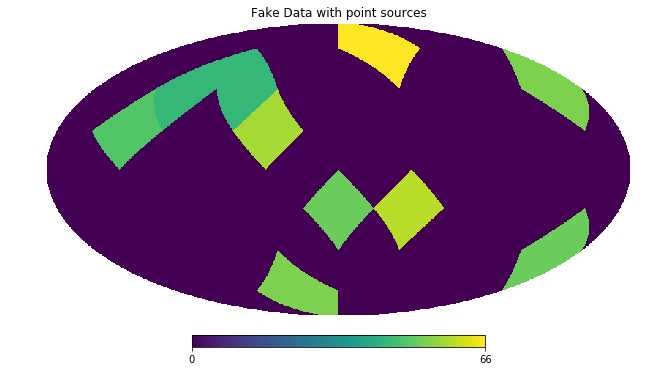

In [11]:
for ips in range(10):
    data[np.random.randint(npix)] += np.random.poisson(50)

hp.mollview(data,title='Fake Data with point sources')

In [47]:
n = nptfit.NPTF(tag='ex')
n.load_data(data,exposure)

iso = np.ones(npix)
n.add_template(iso, 'iso_p',units='flux')
n.add_template(iso, 'iso_np',units='PS')

n.add_poiss_model('iso_p', '$A_\mathrm{iso}$', [0,2], False)
n.add_non_poiss_model('iso_np',
                      ['$A^\mathrm{ps}_\mathrm{iso}$','$n_1$','$n_2$', '$n_3', '$S_b$', '$S_b2$'],
                      [[-10,1],[2.05,60],[-5,5], [-60,1.95],[0.01,200], [0.01,100]],
                      [True,False,False,False,False,False])

n.configure_for_scan()
print(n.ll([0.1, -1.2, 38.5, 0, -35.3, 49*0.5, 0.5]))

No mask set; defaulting to a blank mask
The number of parameters to be fit is 7
-115.74087573723384


In [48]:
n2 = nptfit.NPTF(tag='ex2')
n2.load_data(data,exposure)

iso = np.ones(npix)
n2.add_template(iso, 'iso_p',units='flux')
n2.add_template(iso, 'iso_np',units='PS')

n2.add_poiss_model('iso_p', '$A_\mathrm{iso}$', [0,2], False)
n2.add_non_poiss_model('iso_np',
                      ['$A^\mathrm{ps}_\mathrm{iso}$','$n_1$','$n_2$', '$n_3', '$S_b$', '$S_b2$'],
                      [[-10,1],[2.05,60],[-5,5], [-60,1.95],[0.01,200], [0.01,1]],
                      [True,False,False,False,False,False],
                      dnds_model='specify_relative_breaks')

n2.configure_for_scan()
print(n2.ll([0.1, -1.2, 38.5, 0, -35.3, 49, 0.5]))

No mask set; defaulting to a blank mask
The number of parameters to be fit is 7
[24.5]
[[0.06309573444801933, 38.5, 0.0, -35.3, 24.5, 0.5]]
-115.74087573723384
